In [1]:
from scoresbibm.utils.data_utils import query, get_summary_df, load_model
from scoresbibm.utils.plot import plot_metric_by_num_simulations, use_style,multi_plot

import matplotlib.pyplot as plt

import jax 
import jax.numpy as jnp

In [2]:
df = query("../../../results/example_guidance")
df

,method,task,num_simulations,seed,model_id,metric,value,time_train,time_eval,cfg
0,score_transformer,two_moons_all_cond,100000,0,0,none,NaN,977.567293,NaN,"{'name': 'example_guidance', 'seed': 0, 'model..."
1,score_transformer_joint,two_moons_all_cond,100000,0,1,none,NaN,1047.143678,NaN,"{'name': 'example_guidance', 'seed': 0, 'model..."


In [3]:
model = load_model("../../../results/example_guidance", 1)

In [4]:
model_conditional = load_model("../../../results/example_guidance", 0)

In [5]:
condition_mask_posterior = jnp.array([False, False, True, True])
observation_posterior = jnp.array([0., 0.])

In [6]:
samples1 = model_conditional.sample(5000, condition_mask=condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0))

Sampling method:  sde


In [7]:
samples2 = model.sample(5000, condition_mask=condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0), sampling_method="repaint", resampling_steps=0)

Sampling method:  repaint


In [8]:
samples3 = model.sample(5000, condition_mask=condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0), sampling_method="repaint", resampling_steps=5)

Sampling method:  repaint


In [9]:
samples4 = model.sample(5000, condition_mask=condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0), sampling_method="generalized_guidance", resampling_steps=0, constraint_name="conditional")

Sampling method:  generalized_guidance


In [10]:
samples5 = model.sample(5000, condition_mask=condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0), sampling_method="generalized_guidance", resampling_steps=5, constraint_name="conditional")

Sampling method:  generalized_guidance


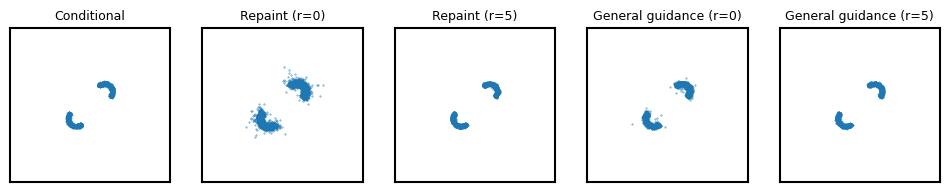

In [11]:
with use_style("pyloric"):
    fig, axs = plt.subplots(1, 5, figsize=(12, 2))
    axs[0].scatter(samples1[:, 0], samples1[:, 1], s=0.1, rasterized=True)
    axs[1].scatter(samples2[:, 0], samples2[:, 1], s=0.1, rasterized=True)
    axs[2].scatter(samples3[:, 0], samples3[:, 1], s=0.1, rasterized=True)
    axs[3].scatter(samples4[:, 0], samples4[:, 1], s=0.1, rasterized=True)
    axs[4].scatter(samples5[:, 0], samples5[:, 1], s=0.1, rasterized=True)

    titles = ["Conditional", "Repaint (r=0)", "Repaint (r=5)", "General guidance (r=0)", "General guidance (r=5)"]
    for ax in axs:
        ax.set_xlim([-1,1.])
        ax.set_ylim([-1,1.])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles.pop(0))
        # Enable upper and right spine
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        
    fig.savefig("guidance_two_moons_example.svg", bbox_inches="tight")
        

In [12]:
# Observation interval
samples6 = model.sample(5000, condition_mask=condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0), sampling_method="generalized_guidance", resampling_steps=5, constraint_name="interval", constraint_kwargs={"a":-0.1, "b": 0.1}, return_conditioned_samples=True)

Sampling method:  generalized_guidance


In [13]:
# Parital Observation interval
samples7 = model_conditional.sample(5000, condition_mask=jnp.array([False, False, False, True]), constraint_mask = jnp.array([False, False, True, False]), x_o=observation_posterior[-1:], rng=jax.random.PRNGKey(0), sampling_method="generalized_guidance", resampling_steps=5, constraint_name="interval", constraint_kwargs={"a":-0.1, "b": 0.1}, return_conditioned_samples=True)

Sampling method:  generalized_guidance


In [14]:
# Parital Observation interval
samples8 = model_conditional.sample(5000, condition_mask=jnp.array([False, False, True, False]), constraint_mask = jnp.array([False, False, False, True]), x_o=observation_posterior[:-1], rng=jax.random.PRNGKey(0), sampling_method="generalized_guidance", resampling_steps=5, constraint_name="interval", constraint_kwargs={"a":-0.1, "b": 0.1}, return_conditioned_samples=True)

Sampling method:  generalized_guidance


In [15]:
# Observation interval and theta constraint
samples9 = model_conditional.sample(5000, condition_mask=condition_mask_posterior, constraint_mask=~condition_mask_posterior, x_o=observation_posterior, rng=jax.random.PRNGKey(0), sampling_method="generalized_guidance", resampling_steps=5, constraint_name="interval", constraint_kwargs={"a":None, "b": 0.}, return_conditioned_samples=True)

Sampling method:  generalized_guidance


In [16]:
# Observation interval and theta constraint
samples10 = model_conditional.sample(5000, condition_mask=jnp.array([False, False, True, True]), x_o=observation_posterior, rng=jax.random.PRNGKey(0), sampling_method="generalized_guidance", resampling_steps=5, constraint_name="linear", constraint_kwargs={"a": jnp.array([0.,0.,1.,1.])}, return_conditioned_samples=True, default_scaling_fn_bias=1e-8)

Sampling method:  generalized_guidance


In [17]:
with use_style("pyloric"):
    fig, axs = plt.subplots(1, 5, figsize=(12, 2))
    axs[0].scatter(samples6[:, 0], samples6[:, 1], s=0.01, rasterized=True)
    axs[1].scatter(samples7[:, 0], samples7[:, 1], s=0.01, rasterized=True)
    axs[2].scatter(samples8[:, 0], samples8[:, 1], s=0.01, rasterized=True)
    axs[3].scatter(samples9[:, 0], samples9[:, 1], s=0.01, rasterized=True)
    axs[4].scatter(samples10[:, 0], samples10[:, 1], s=0.01, rasterized=True)

    titles = [r"$p(\theta|x \in [-0.1, 0.1])$", r"$p(\theta|x_1 \in [-0.1,0.1], x_2=0.)$", r"$p(\theta|x_1=0, x_2 \in [-0.1,0.1])$", r"$p(\theta|x, \theta < 0)$", r"$p(\theta|x_1 + x_2 = 0)$"]
    for ax in axs:
        ax.set_xlim([-1,1.])
        ax.set_ylim([-1,1.])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles.pop(0))
        # Enable upper and right spine
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        
    fig.savefig("abstract_guidance_two_moons_example.svg", bbox_inches="tight")
        